# Introduction

The dataset that I have wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Gathering Data

In [1]:
# Loading necessary libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
import sqlite3
import seaborn as sns
from timeit import default_timer as timer

%matplotlib inline

In [2]:
# Reading data from CSV using Pandas library

archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# Import the data programmatically using 'requests'
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Save the data into a file called 'image_predictions.tsv'
with open ('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

# Read the file using tab as a seperator
image_predictions_df = pd.read_table('image_predictions.tsv', sep = '\t')

# Show the header
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,Chesapeake_Bay_retriever,0.382220,True,American_Staffordshire_terrier,0.350140,True,seat_belt,0.098874,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
1393,767191397493538821,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False


In [4]:
# Storing tweet ids into a new dataframe
tweet_ids = archive_df['tweet_id']

In [5]:
# Total number of Tweets
len(tweet_ids)

2356

In [6]:
# Connecting twitter API to download data

consumer_key = 'pGig8fbpkRcc4LSOjk6id2zKK'
consumer_secret = 'mNWOl5CEZZmkkmlpRYd1C8KmIERWniVf08X4tx7ieaC5o19w4L'
access_token = '1257837009755832321-rDyX7AIXkIJS3EeV7Nr7pCPrAnbqZx'
access_secret = 'nC6XKTsYzVS9A6tBs7Hg4SViraycvh4KGDL0TltrHYQwk'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Storing data from Twitter API in a list

tweet_ids = list(archive_df.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
count = 0
for tweet_id in tweet_ids:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
        print("Success")
    except tweepy.TweepError as e:
        print("Error")
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Error
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072

Error
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
29

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Error
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
80

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Error
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [8]:
# Number of tweets for which data was not fetched
len(fails_dict)

26

#Writing the data into text file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [9]:
#Reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    
tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,'favorites': favourites})
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_info_df.sample(5)

,tweet_id,retweets,favorites
930,751793661361422336,2922,5872
539,803638050916102144,4247,11207
822,766693177336135680,810,4064
1595,684959798585110529,3122,6827
2082,670465786746662913,525,939


In [10]:
# Check for duplicate rows
tweets_info_df['tweet_id'].duplicated().sum()

0

### Final Gathered Data consists of below dataframes - 

1. archive_df - This dataframe contains details of all the tweets.
2. tweets_info_df - This dataframe contains tweet_id, number of retweets, and number of favorites for each tweet. The data is downloaded using Twitter API
3. image_prediction_df - This dataframe contains information about predictions of the image. It is downloaded from the URL provided.

## Assessing the Data

In [11]:
# Display the archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# Display all columns in archive_df table
for i,v in enumerate(archive_df.columns):
    print(i,v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


The detailed description of each column can be found on this link --> https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html

In [13]:
#Checking the descriptive statistics 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#Checking the datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Checking the missing values
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
archive_df[archive_df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [18]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
#Checking the rating values for  denominator
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
#identify the rating with denominator 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
#Checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [22]:
#Check for complete text for first entry
archive_df['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

Quality assessment of archive_df dataframe - 

1. There are missing values in columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

2. rating_numerator and rating_denominator has inconsistent values.

3. One of the tweet (tweet_id = 835246439529840640) has denominator rating of 0

4. Dog names consists of filler words like 'a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

5. Datatype of timestamp and retweeted_status_timestamp should be DateTime. It is currently string.

6. Datatypes of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be integer. It is currently float.

7. In columns doggo, floofer, pupper , puppo, there are some missing values represented by None.


Tidiness assessment of archive_df dataframe - 
1. Some attributes like Number of Favorites and Number of Retweet are in seperate dataframe. It should be merged in this dataframe.

In [23]:
# Display the tweets_info_df  table
tweets_info_df.head(5)

,tweet_id,retweets,favorites
0,892420643555336193,7728,36308
1,892177421306343426,5720,31305
2,891815181378084864,3785,23577
3,891689557279858688,7889,39613
4,891327558926688256,8508,37821


In [24]:
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites'], dtype='object')

In [25]:
#Checking the descriptive statistics 
tweets_info_df.describe()

,retweets,favorites
count,2331.000000,2331.000000
mean,2712.767482,7584.075075
std,4588.005730,11769.698123
min,1.000000,0.000000
25%,548.500000,1323.000000
50%,1273.000000,3299.000000
75%,3151.500000,9293.500000
max,78104.000000,156721.000000


In [26]:
#Checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [27]:
#Checking missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [28]:
#Checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites


Quality assessment of tweets_info dataframe - 

1. Information for 25 tweets is not available when downloaded from twitter API


Tidiness assessment of tweets_info dataframe - 
1. Attributes like Number of Favorites and Number of Retweet in this dataframe should be merged with archive_df dataframe which has other attributes of the tweet.

In [29]:
# Display the image predictions table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
image_predictions_df.shape

(2075, 12)

In [31]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [32]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Quality and tidiness assessment of image_predictions_df dataframe - 

1. Data is clean with no missing values.
2. Predictions are available for 2075 tweets.
3. Prediction output will be merged with archive_df dataframe so that all the details are captured in a single dataframe.

## Cleaning Dataset

For cleaning the dataset, define-code-test approach is used.

#### Define

Create the copy of each dataframe so that original dataframe is retained

#### Code

In [35]:
archive_clean = archive_df.copy()
tweets_clean = tweets_info_df.copy()
img_pred_clean = image_predictions_df.copy()

#### Test

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [38]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

Convert datatype of tweet_id in all the dataframes to string

#### Code

In [39]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

#### Test

In [40]:
archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [41]:
img_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [42]:
tweets_clean.dtypes

tweet_id     object
retweets      int64
favorites     int64
dtype: object

#### Define

Merge attributes from tweets_clean and img_pred_clean in archive_clean by using a inner join with tweet_id as unique key.

#### Code

In [43]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean, how = 'inner', on = 'tweet_id')

#### Test

In [44]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
553,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,...,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
93,870656317836468226,NaN,NaN,2017-06-02 15:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cody. He zoomed too aggressively and t...,NaN,NaN,NaN,https://www.gofundme.com/help-fix-codys-torn-a...,...,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True
155,854365224396361728,NaN,NaN,2017-04-18 16:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854365224...,...,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True
1140,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187...,...,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False
1239,692919143163629568,NaN,NaN,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692919143...,...,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True


In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [46]:
archive_clean.shape

(2059, 30)

In [47]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Define

Convert different dog categories (doggo, floffer, pupper, puppo) into one column

#### Code

In [48]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')

In [49]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
1281,689877686181715968,NaN,NaN,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689877686...,...,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True,doggo,None
4263,857393404942143489,NaN,NaN,2017-04-27 00:38:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",NaN,NaN,NaN,https://www.gofundme.com/meeko-needs-heart-sur...,...,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True,pupper,None
3382,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,...,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False,floofer,None
3877,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,...,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True,floofer,None
5258,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187...,...,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False,pupper,None


In [50]:
archive_clean['dog_stage'].value_counts()

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [51]:
archive_clean['variable'].value_counts()

puppo      2059
doggo      2059
pupper     2059
floofer    2059
Name: variable, dtype: int64

In [52]:
archive_clean.drop(['variable'], axis=1,inplace= True)

In [53]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [54]:
archive_clean = archive_clean.drop_duplicates()

In [55]:
archive_clean.shape

(2390, 27)

In [56]:
archive_clean['tweet_id'].duplicated().sum()

331

In [57]:
archive_clean['dog_stage'].value_counts()

None       2059
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [58]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2390, 27)

In [59]:
# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(331, 27)

In [60]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

741067306818797568    2
775898661951791106    2
855851453814013952    2
785639753186217984    2
802265048156610565    2
Name: tweet_id, dtype: int64

In [61]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4475,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [62]:
#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

357     This is Dido. She's playing the lead role in "...
4475    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

In [63]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series]

In [64]:
dup_tweet_dog_stage_1.shape

(305, 27)

In [65]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [66]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 
# (Even with valid dog_stage there are duplicates inside it)
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id'])

In [67]:
dup_tweet_dog_stage_2.shape

(305, 27)

In [68]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape

(2046, 27)

#### Test

In [69]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [70]:
dup_df_merged.dog_stage.value_counts()

None       1741
pupper      210
doggo        65
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [71]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2046 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   2046 non-null   object 
 4   source                      2046 non-null   object 
 5   text                        2046 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2046 non-null   object 
 10  rating_numerator            2046 non-null   int64  
 11  rating_denominator          2046 non-null   int64  
 12  name                        2046 non-null   object 
 13  retweets                    2046 

In [72]:
archive_clean = dup_df_merged.copy()

#### Define

Convert following columns into string - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id
Convert following columns into datetime - retweeted_status_timestamp, timestamp

#### Code

In [73]:
archive_clean['in_reply_to_status_id'] = archive_clean['in_reply_to_status_id'].astype(str)
archive_clean['in_reply_to_user_id'] = archive_clean['in_reply_to_user_id'].astype(str)
archive_clean['retweeted_status_id'] = archive_clean['retweeted_status_id'].astype(str)
archive_clean['retweeted_status_user_id'] = archive_clean['retweeted_status_user_id'].astype(str)

archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp']) 
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [74]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2046 non-null   object             
 1   in_reply_to_status_id       2046 non-null   object             
 2   in_reply_to_user_id         2046 non-null   object             
 3   timestamp                   2046 non-null   datetime64[ns, UTC]
 4   source                      2046 non-null   object             
 5   text                        2046 non-null   object             
 6   retweeted_status_id         2046 non-null   object             
 7   retweeted_status_user_id    2046 non-null   object             
 8   retweeted_status_timestamp  70 non-null     datetime64[ns, UTC]
 9   expanded_urls               2046 non-null   object             
 10  rating_numerator            2046 non-null   int64           

#### Define

Dog names consists of filler words like 'a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'. Change these names to 'None'

#### Code

In [75]:
pd.set_option('display.max_colwidth', None)

In [76]:
archive_clean.text[archive_clean.name =='infuriating']

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [77]:
lst = ['a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])

514                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
636                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
809                    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
811                      Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
820                          This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
982                     People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
992             

In [78]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'

C:\Users\17655\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [79]:
lst = ['a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


In [80]:
archive_clean.name.value_counts()[:10]

None       664
Cooper      10
Tucker      10
Oliver      10
Penny       10
Charlie     10
Lucy         9
Winston      8
Sadie        8
Bo           8
Name: name, dtype: int64

#### Define

Column retweeted_status_timestamp has missing values. However, the variable is not too important. Hence, dropping the said column

#### Code

In [81]:
archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp    1976
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
retweets                         0
favorites                        0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
dog_stage                        0
dtype: int64

In [82]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

#### Test

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2046 non-null   object             
 1   in_reply_to_status_id     2046 non-null   object             
 2   in_reply_to_user_id       2046 non-null   object             
 3   timestamp                 2046 non-null   datetime64[ns, UTC]
 4   source                    2046 non-null   object             
 5   text                      2046 non-null   object             
 6   retweeted_status_id       2046 non-null   object             
 7   retweeted_status_user_id  2046 non-null   object             
 8   expanded_urls             2046 non-null   object             
 9   rating_numerator          2046 non-null   int64              
 10  rating_denominator        2046 non-null   int64              
 11  name             

## Storing the clean dataset in a CSV file

In [84]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualising the cleaned dataset

In [85]:
for i,v in enumerate(archive_clean.columns):
    print(i,v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 expanded_urls
9 rating_numerator
10 rating_denominator
11 name
12 retweets
13 favorites
14 jpg_url
15 img_num
16 p1
17 p1_conf
18 p1_dog
19 p2
20 p2_conf
21 p2_dog
22 p3
23 p3_conf
24 p3_dog
25 dog_stage


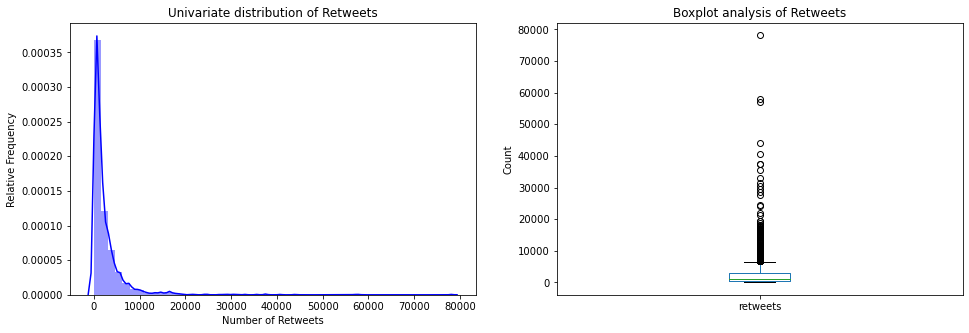

In [86]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'blue')
plt.ylabel('Relative Frequency')
plt.xlabel('Number of Retweets')
plt.title('Univariate distribution of Retweets')

plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))
plt.ylabel('Count')
plt.title('Boxplot analysis of Retweets')

plt.show()

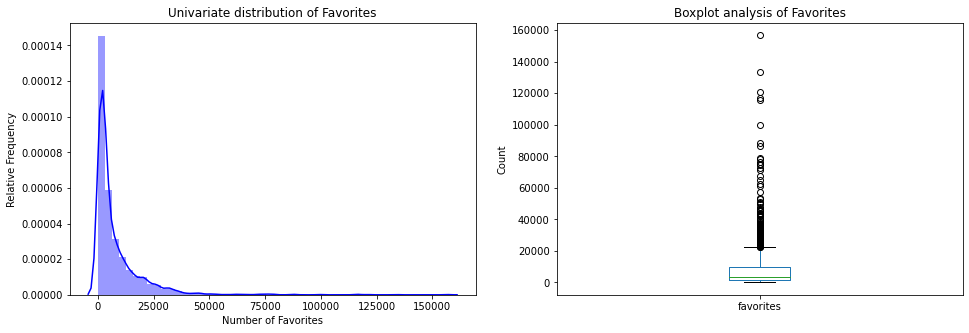

In [87]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'blue')
plt.ylabel('Relative Frequency')
plt.xlabel('Number of Favorites')
plt.title('Univariate distribution of Favorites')

plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))
plt.ylabel('Count')
plt.title('Boxplot analysis of Favorites')

plt.show()

In [88]:
# Capping the values to 1 for whichever values <=0
archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1

C:\Users\17655\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\17655\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage', 'favorites_mod', 'retweets_mod'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

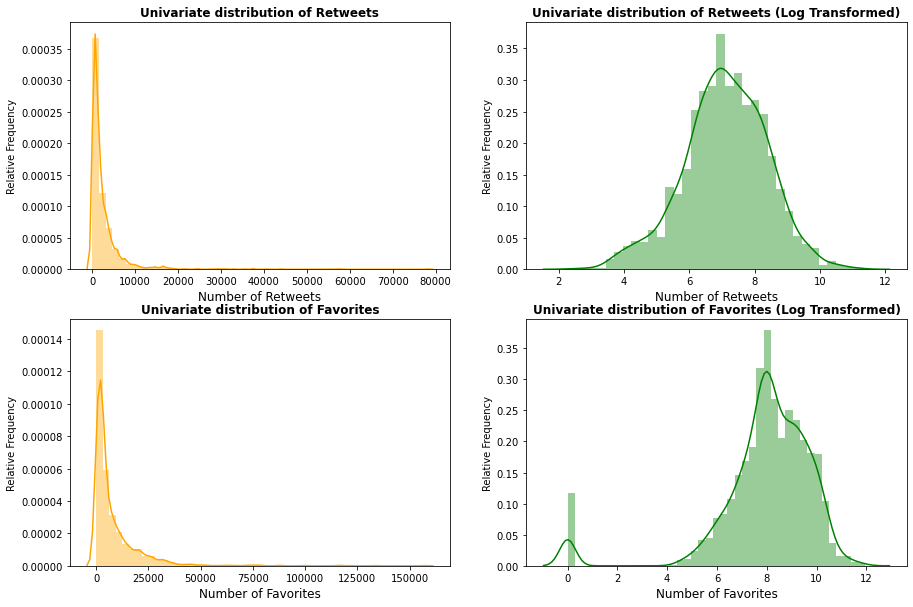

In [90]:
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'orange')
plt.title('Univariate distribution of Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Number of Retweets', fontsize=12)
plt.ylabel('Relative Frequency')

plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'green')
plt.title('Univariate distribution of Retweets (Log Transformed)', fontweight="bold", fontsize = 12.0)
plt.xlabel('Number of Retweets', fontsize=12)
plt.ylabel('Relative Frequency')
                                                                    
plt.subplot(223)
sns.distplot(archive_clean.favorites, color = 'orange')
plt.title('Univariate distribution of Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Number of Favorites', fontsize=12)
plt.ylabel('Relative Frequency')

plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green')
plt.title('Univariate distribution of Favorites (Log Transformed)', fontweight="bold", fontsize = 12.0)
plt.xlabel('Number of Favorites', fontsize=12)
plt.ylabel('Relative Frequency');

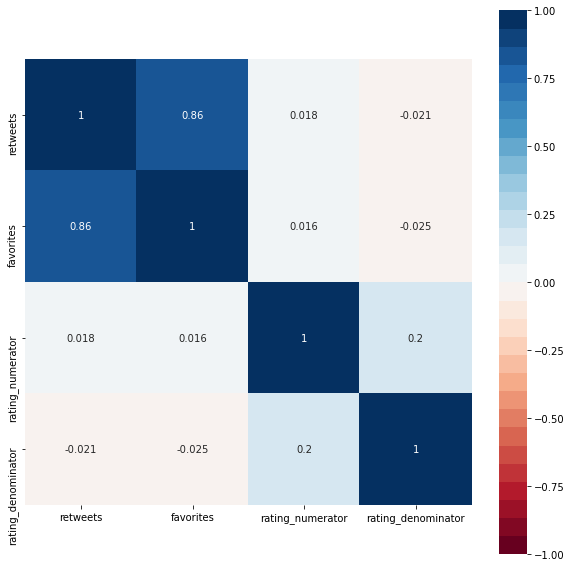

In [91]:
# Correlation between numerical variables
num_cols_data = (archive_clean[['retweets','favorites', 'rating_numerator', 'rating_denominator']])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
cm1 = plt.cm.get_cmap('RdBu', 30)
sns.heatmap(matrix, vmax=1, vmin=-1, square=True, cmap=cm1, annot = True);

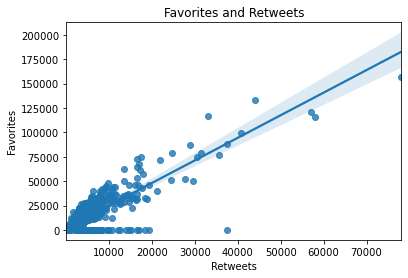

In [92]:
graph = sns.regplot(x=archive_clean['retweets'], y=archive_clean['favorites'])
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
fig = graph.get_figure()
fig.savefig('scatterplot.png')

Retweets and Favorites are highly correlated with each other

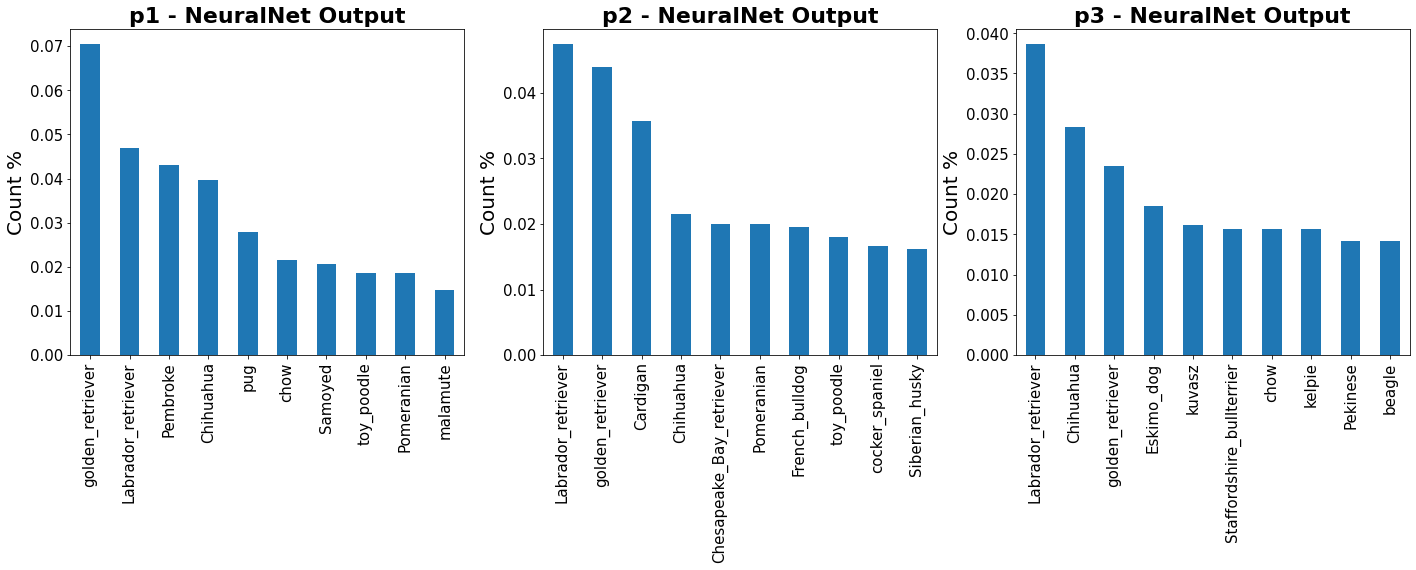

In [93]:
plt.figure(1)
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - NeuralNet Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - NeuralNet Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - NeuralNet Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0);

Golder Retriever, Labrador Retriever, and Chihuahua are the top prediction by the Neural Network Algorithm.

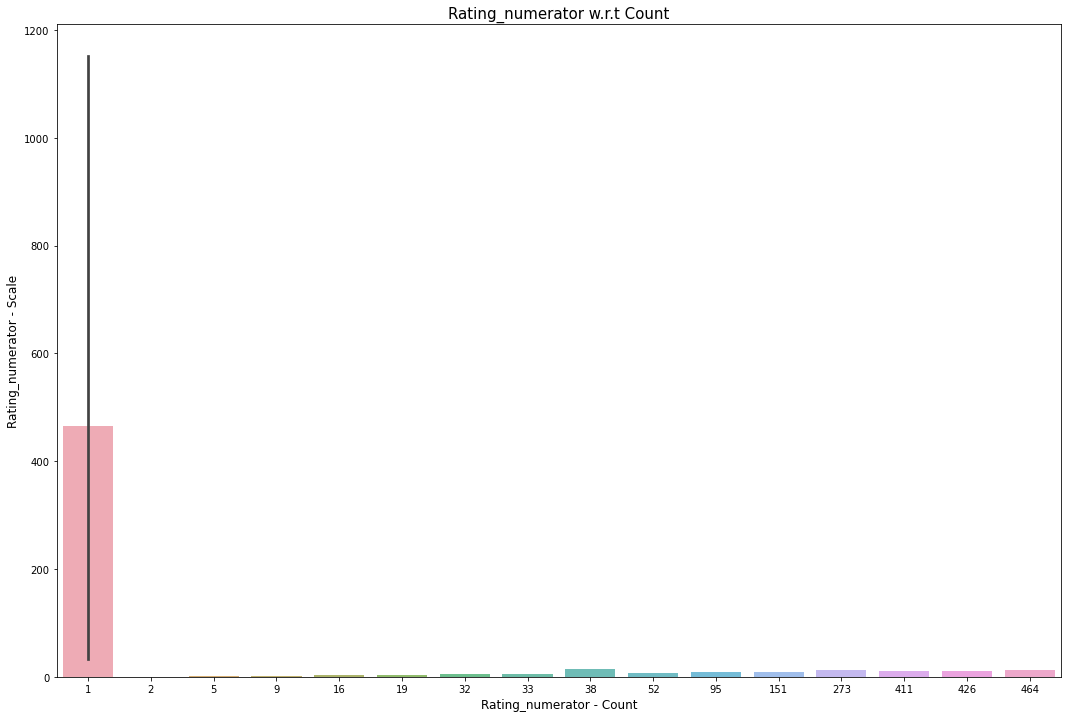

In [94]:
# Top rating_numerator values based on the count
cnt_srs = archive_clean['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,12))
graph = sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()
fig = graph.get_figure()
fig.savefig('rating_numerator.png')

Rating numerator is around 10

In [95]:
archive_clean[archive_clean['rating_denominator'] < 10].shape

(2, 28)

In [96]:
archive_clean[archive_clean['rating_denominator'] > 10].shape

(16, 28)

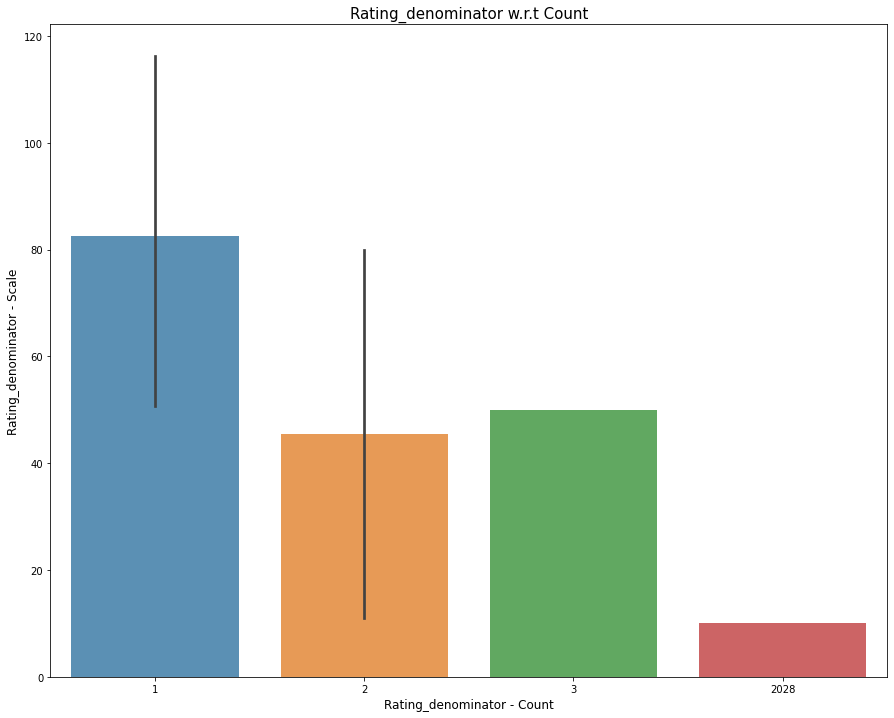

In [97]:
# Top rating_denominator values based on the count
cnt_srs = archive_clean['rating_denominator'].value_counts().head(30)
plt.figure(figsize=(15,12))
graph = sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_denominator - Count', fontsize=12)
plt.ylabel('Rating_denominator - Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=15)
plt.show()
fig = graph.get_figure()
fig.savefig('rating_denominator.png')

2028 have denominator '10' while some have denominator rating more than or less than 10

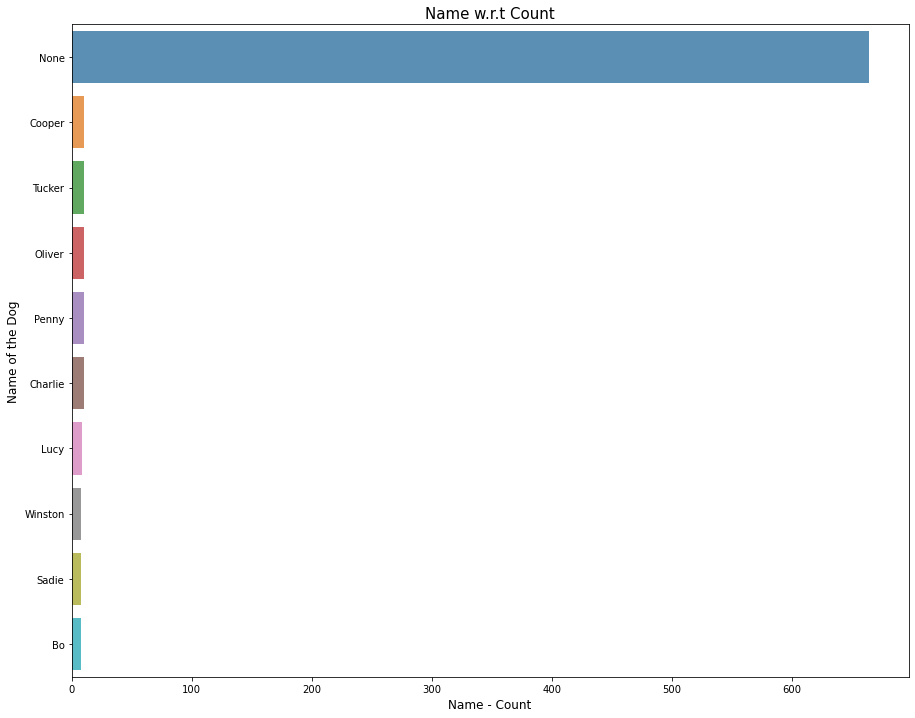

In [98]:
# Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

Majority of the dog names are 'None'

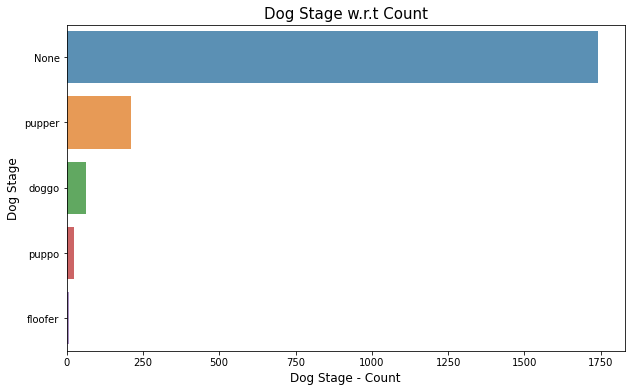

In [99]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

Among other categories, pupper category is dominant.